In [3]:
#load class
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler #module for perform scaling
from sklearn.model_selection import train_test_split 
from sklearn import metrics #module for evaluating performance

#load your data
df = pd.read_csv("fake_data.csv") #change the name accordingly
df.head() # prints top 5 rows from the datatset to check data is load or no

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# remove duplicatesd
df = df.drop_duplicates()

# prepare features
x = df.drop(['Label'],axis=1) #remove class or label
y = df['Label'] #load label

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

# Scale the data using standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) #scale training set
x_test = scaler.transform(x_test) #scale test set

Missing Values:
 Temp     0
Humd     0
Label    0
dtype: int64


### Algorithm #1: KNN Classifier

In [4]:
from sklearn.neighbors import KNeighborsClassifier

z = KNeighborsClassifier(n_neighbors=3) # KNN classifier for 3 neighbours
KNN = z.fit(x_train,y_train) # start training
KNN_predict = KNN.predict(x_test) # performance in the test set

predict = metrics.accuracy_score(y_test, KNN_predict)
print("KNearestNeighbors Accuracy: {:.5f}".format(predict))

KNearestNeighbors Accuracy: 1.00000


In [5]:
# library for save and load scikit-learn models
import pickle
# file name, recommending *.pickle as a file extension
filename = "KNN.pickle"
# save model
pickle.dump(z, open(filename, "wb"))

### Algorithm #2: RandomForestClassifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

#Evaluate the accuracy
rf_accuracy = metrics.accuracy_score(y_test, rf_pred)
print("RandomForestClassifier Accuracy: {:.5f}".format(rf_accuracy))

RandomForestClassifier Accuracy: 1.00000


In [8]:
# library for save and load scikit-learn models
import pickle
# file name, recommending *.pickle as a file extension
filename = "RFC.pickle"
# save model
pickle.dump(z, open(filename, "wb"))

### Algorithm #3: Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_pred = log_reg.predict(x_test)

# Evaluate the accuracy
log_reg_accuracy = metrics.accuracy_score(y_test, log_pred)
print("Logistic Regression Accuracy: {:.5f}".format(log_reg_accuracy))

Logistic Regression Accuracy: 1.00000


In [11]:
# library for save and load scikit-learn models
import pickle
# file name, recommending *.pickle as a file extension
filename = "log_reg.pickle"
# save model
pickle.dump(z, open(filename, "wb"))

### Confussion Matrix

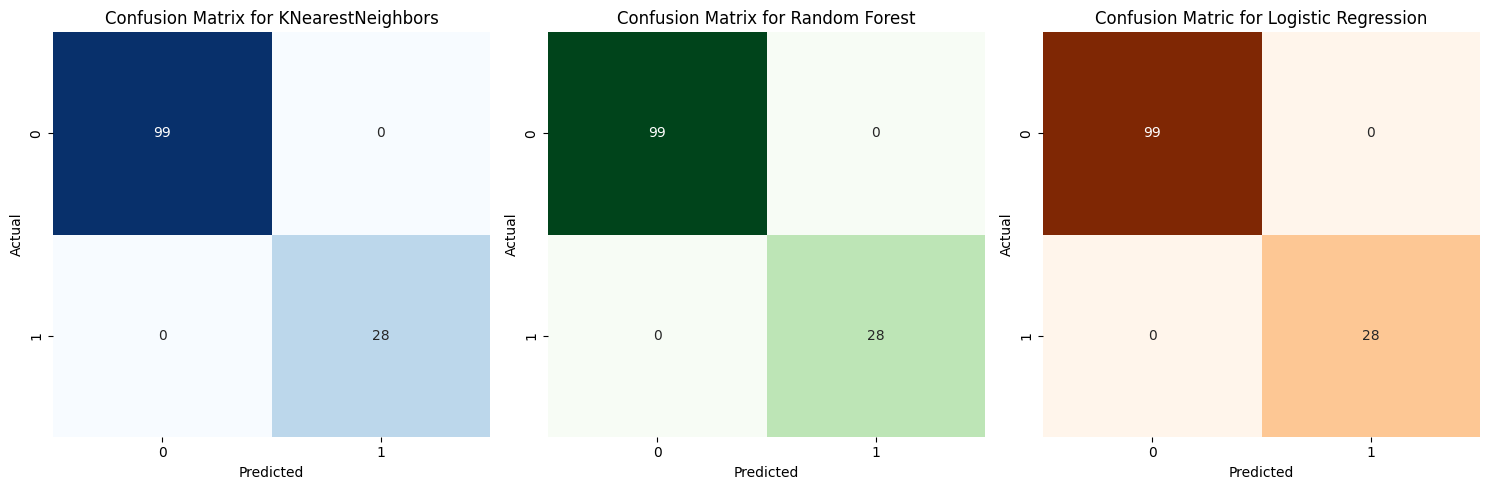

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

KNN_cm = metrics.confusion_matrix(y_test, KNN_predict)
log_reg_cm = metrics.confusion_matrix(y_test, rf_pred)
rf_cm = metrics.confusion_matrix(y_test, log_pred)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(KNN_cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
axes[0].set_title("Confusion Matrix for KNearestNeighbors")

sns.heatmap(log_reg_cm, annot=True, fmt="d", cmap="Greens", cbar=False, ax=axes[1])
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
axes[1].set_title("Confusion Matrix for Random Forest")

sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Oranges", cbar=False, ax=axes[2])
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")
axes[2].set_title("Confusion Matric for Logistic Regression")

plt.tight_layout()
plt.show()